<a href="https://colab.research.google.com/github/as53175n/MENTAL-HEALTH-PROJECT/blob/main/Code2review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

#basic libraries

import numpy as np
import pandas as pd

#visualization libraries

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


In [2]:
import os
from google.colab import drive
drive.mount("/content/drive/")
!ls

Mounted at /content/drive/
drive  sample_data


In [3]:
mh_dataset = pd.read_csv("/content/drive/MyDrive/MentalHealth/survey.csv")

In [4]:
mh_dataset.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
mh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
print(mh_dataset['Country'].value_counts())
print("\n \n")
print(mh_dataset['state'].unique())

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

In [7]:
mh_dataset.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [8]:
print("The dataset contains different age groups including: \n")
print(mh_dataset['Age'].unique())
print("\n \n")
print("The different gender notations used in our dataset are: \n")
print(mh_dataset['Gender'].unique())

The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

 

The different gender notations used in our dataset are: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fl

In [9]:
mh_dataset.drop(mh_dataset[mh_dataset['Age'] < 0].index, inplace = True)
mh_dataset.drop(mh_dataset[mh_dataset['Age'] > 100].index, inplace = True)
mh_dataset['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [10]:
mh_dataset['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

mh_dataset['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

mh_dataset["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

mh_dataset['Gender'].value_counts()

,count
Gender,
Male,988
Female,247
Other,19


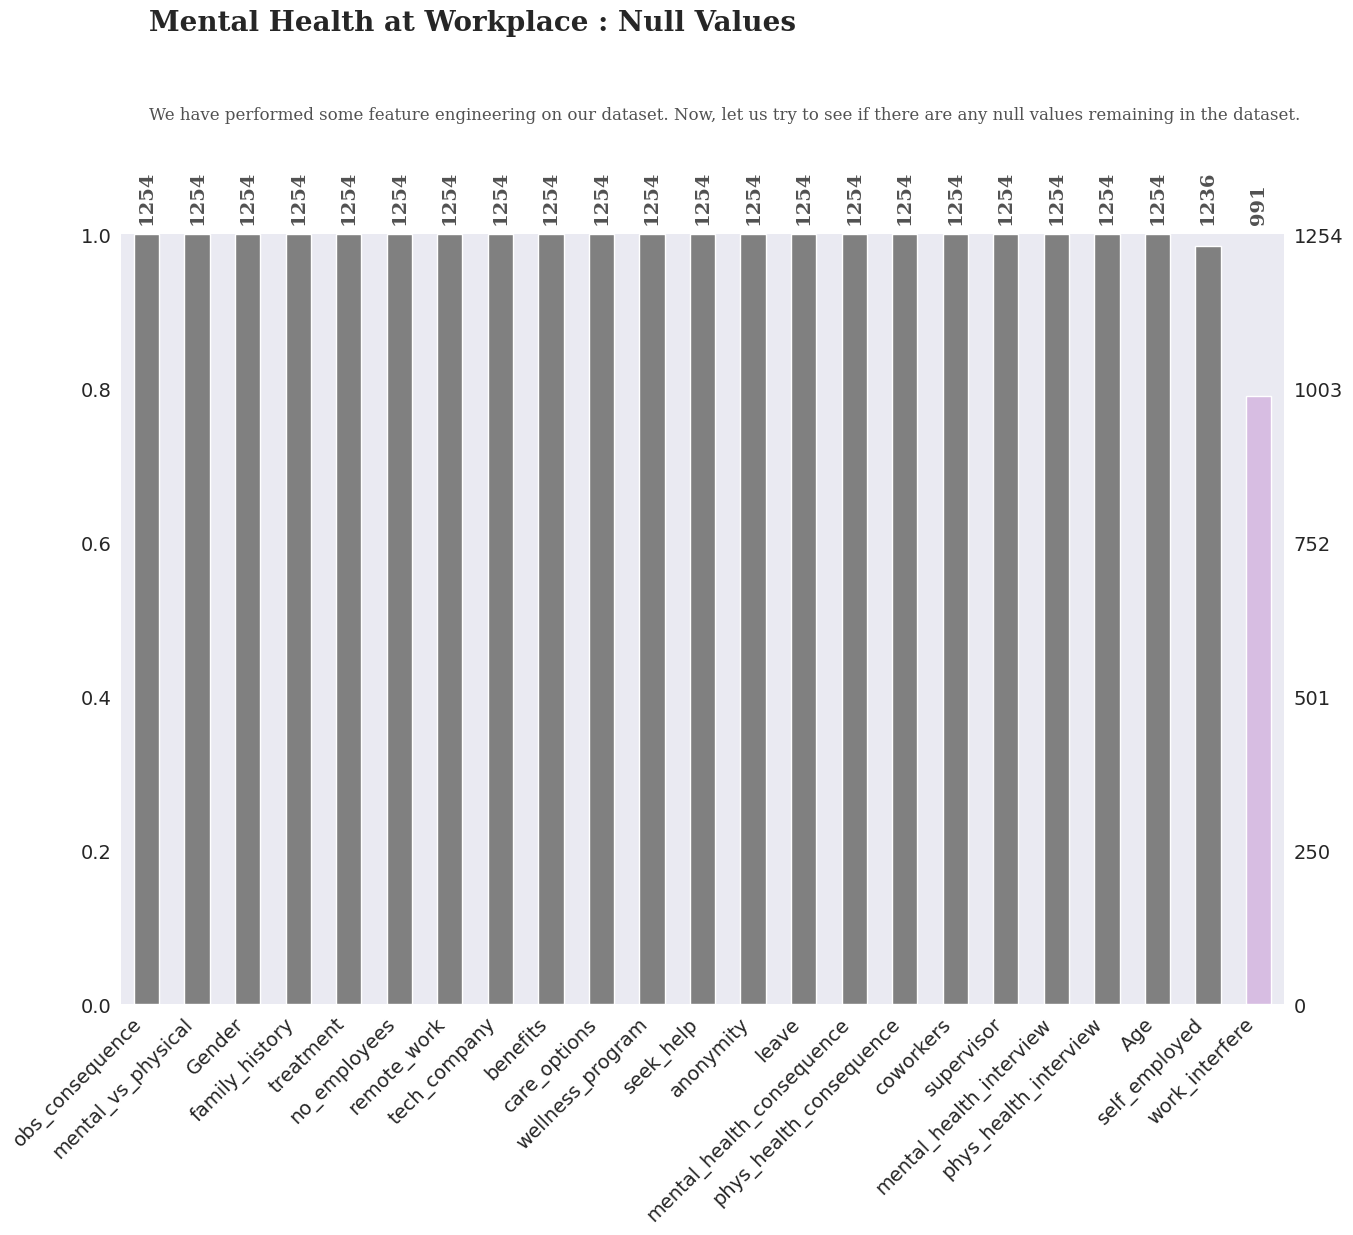

In [11]:
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
msno.bar(mh_dataset,fontsize =14, color = color, sort = 'descending', figsize = (15,10))

plt.text(0.05,1.265,'Mental Health at Workplace : Null Values', {'font':'serif', 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''We have performed some feature engineering on our dataset. Now, let us try to see if there are any null values remaining in the dataset.''', {'font':'serif', 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90,
                   **{'font':'serif','size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()

In [12]:
mh_dataset['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [13]:
mh_dataset['self_employed'] = mh_dataset['self_employed'].fillna('No')
mh_dataset['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
mh_dataset['work_interfere'].unique()


array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [15]:
mh_dataset['work_interfere'] = mh_dataset['work_interfere'].fillna("Don't Know")
mh_dataset['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', "Don't Know"],
      dtype=object)

In [16]:
mh_dataset['work_interfere'].value_counts()

,count
work_interfere,
Sometimes,464
Don't Know,263
Never,213
Rarely,173
Often,141


  treatment  percentage
0       Yes    0.504785
1        No    0.495215


<Axes: title={'center': 'Number of Employees who wants to take Treatment'}, xlabel='treatment', ylabel='percentage'>

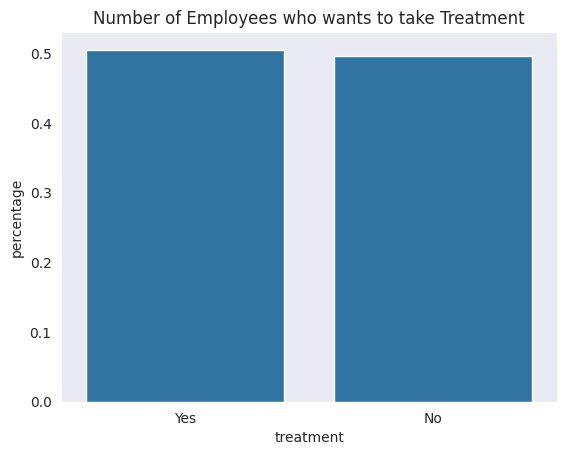

In [17]:
par = mh_dataset['treatment'].value_counts(normalize=True).rename_axis('treatment').reset_index(name = 'percentage')
print(par)
plt.title('Number of Employees who wants to take Treatment')
sns.barplot(x = 'treatment', y = 'percentage', data = par)

<Axes: ylabel='percentage'>

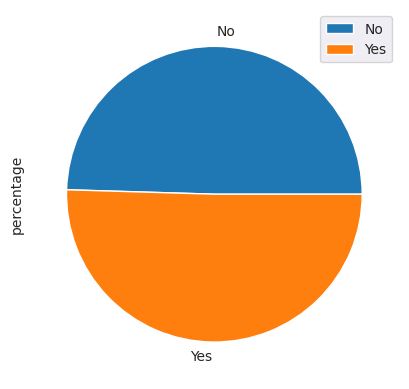

In [18]:
par.groupby(['treatment']).sum().plot(kind='pie', y='percentage')

In [19]:
def cal_per(col):
  percentage = col.value_counts(normalize=True).rename_axis(col.name).reset_index(name = 'percentage')
  return percentage

In [20]:
def pl_fig(col, title1, title2):
  plt.figure(figsize = (15,4))
  plt.subplot(1,2,1)
  per = cal_per(col)
  plt.title(title1)
  sns.barplot(x = col.name, y = 'percentage', data = per)
  plt.subplot(1,2,2)
  plt.title(title2)
  sns.countplot(x = col, y=None , hue=mh_dataset['treatment'])
  plt.show()


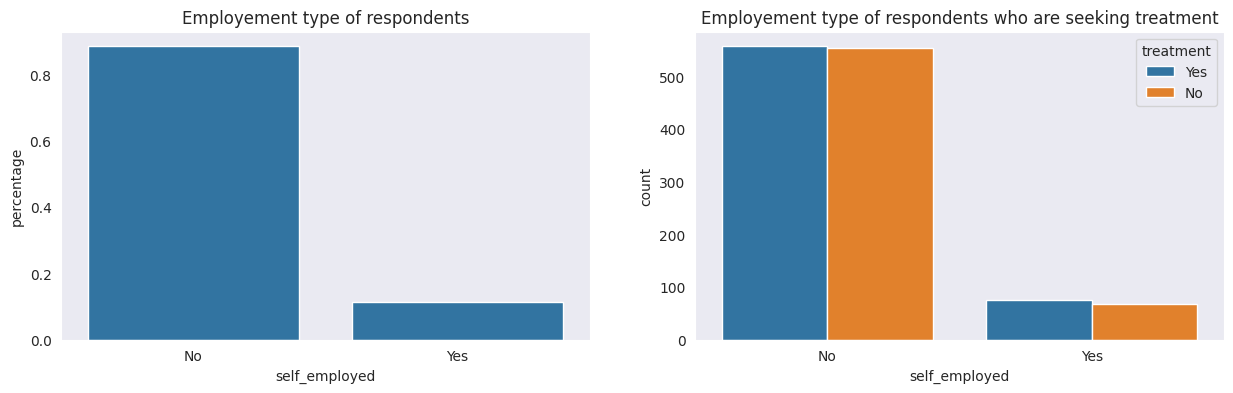

In [21]:
title1 = 'Employement type of respondents'
title2 = 'Employement type of respondents who are seeking treatment'
pl_fig(mh_dataset['self_employed'],title1, title2)

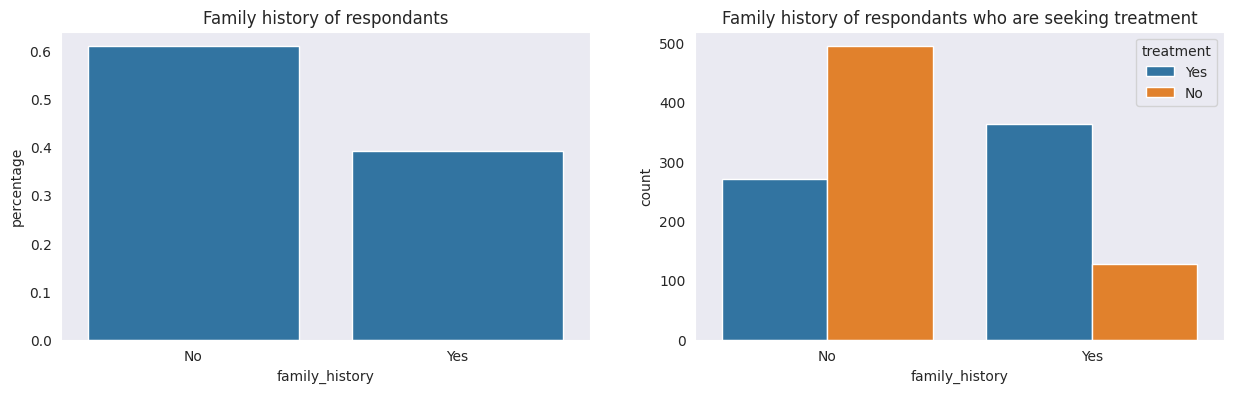

In [22]:

title1 = 'Family history of respondants'
title2 = 'Family history of respondants who are seeking treatment'
pl_fig(mh_dataset['family_history'],title1, title2)

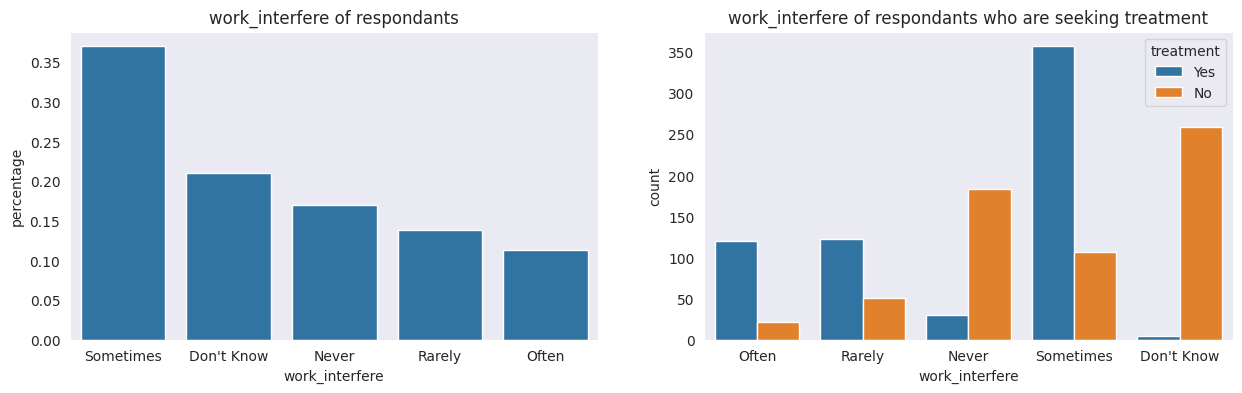

In [23]:
title1 = 'work_interfere of respondants'
title2 = 'work_interfere of respondants who are seeking treatment'
pl_fig(mh_dataset['work_interfere'],title1, title2)

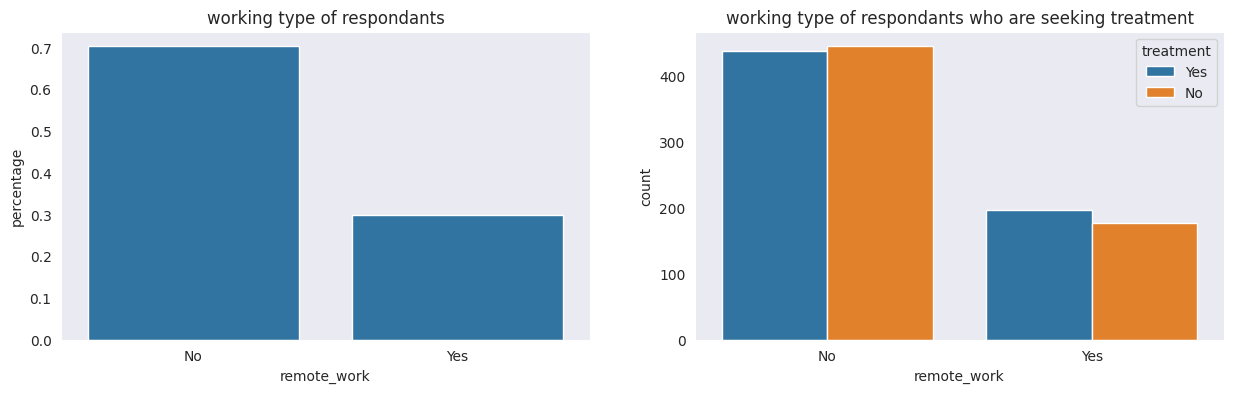

In [24]:
title1 = 'working type of respondants'
title2 = 'working type of respondants who are seeking treatment'
pl_fig(mh_dataset['remote_work'],title1, title2)

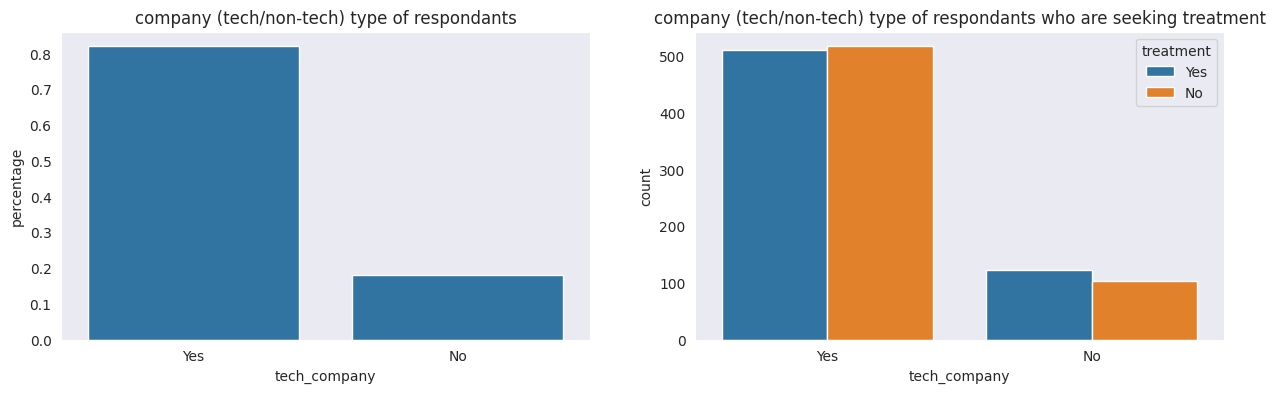

In [25]:
title1 = 'company (tech/non-tech) type of respondants'
title2 = 'company (tech/non-tech) type of respondants who are seeking treatment'
pl_fig(mh_dataset['tech_company'],title1, title2)

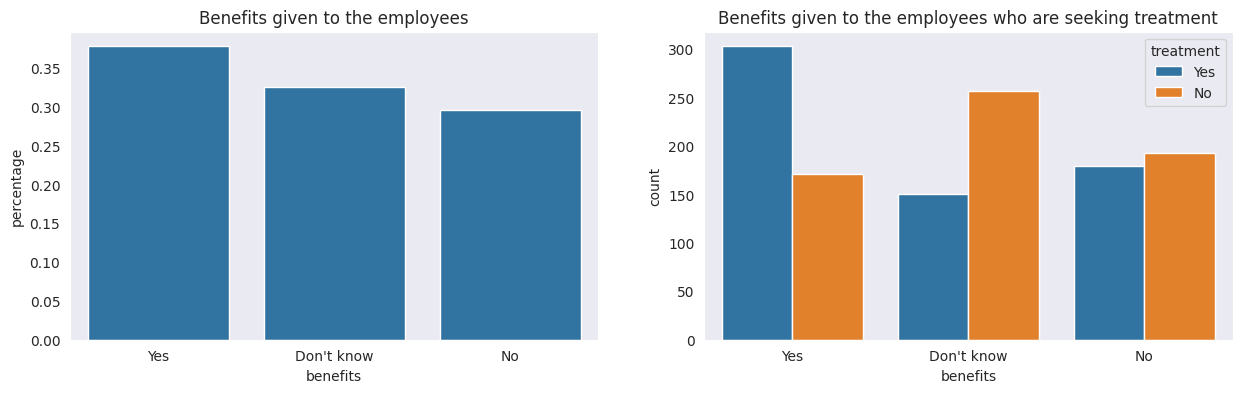

In [26]:
title1 = 'Benefits given to the employees'
title2 = 'Benefits given to the employees who are seeking treatment'
pl_fig(mh_dataset['benefits'],title1, title2)

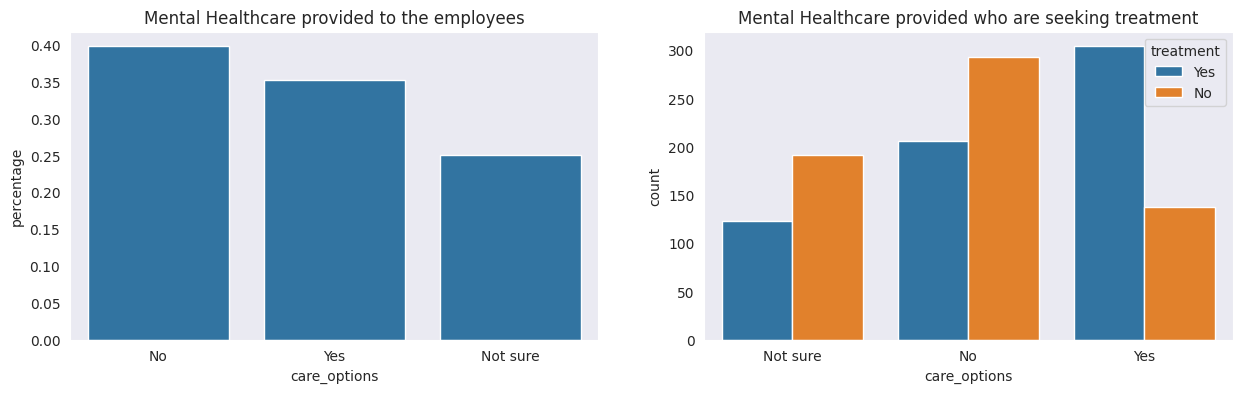

In [27]:
title1 = 'Mental Healthcare provided to the employees'
title2 = 'Mental Healthcare provided who are seeking treatment'
pl_fig(mh_dataset['care_options'],title1, title2)

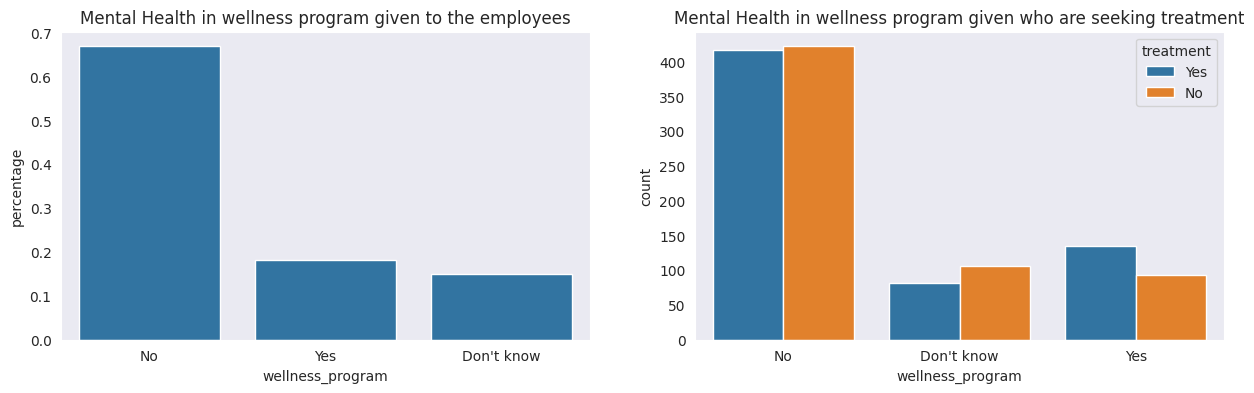

In [28]:
title1 = 'Mental Health in wellness program given to the employees'
title2 = 'Mental Health in wellness program given who are seeking treatment'
pl_fig(mh_dataset['wellness_program'],title1, title2)

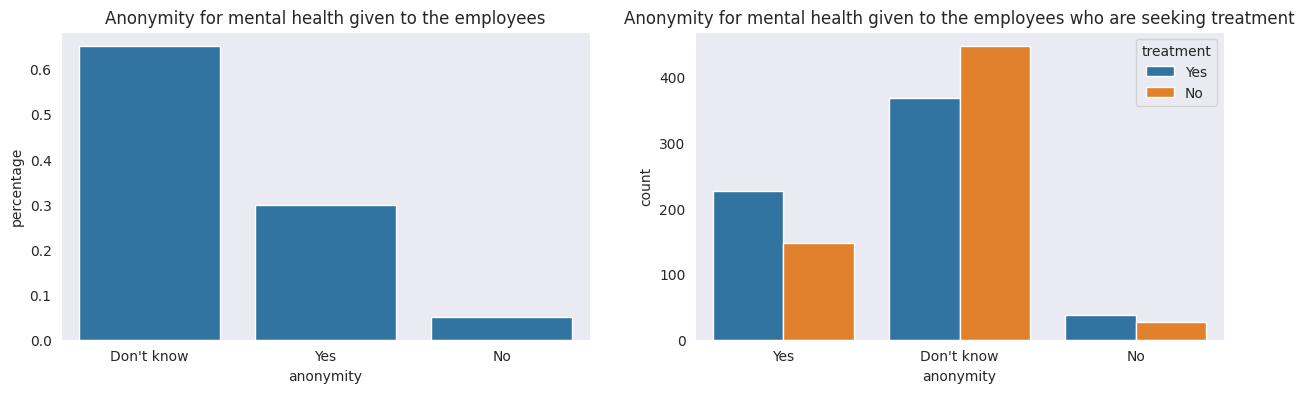

In [29]:
title1 = 'Anonymity for mental health given to the employees'
title2 = 'Anonymity for mental health given to the employees who are seeking treatment'
pl_fig(mh_dataset['anonymity'],title1, title2)

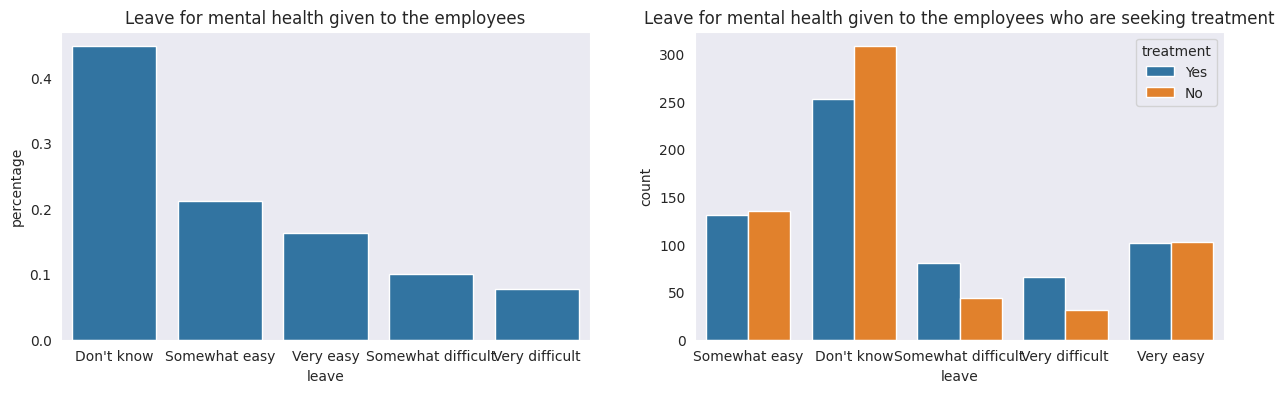

In [30]:
title1 = 'Leave for mental health given to the employees'
title2 = 'Leave for mental health given to the employees who are seeking treatment'
pl_fig(mh_dataset['leave'],title1, title2)

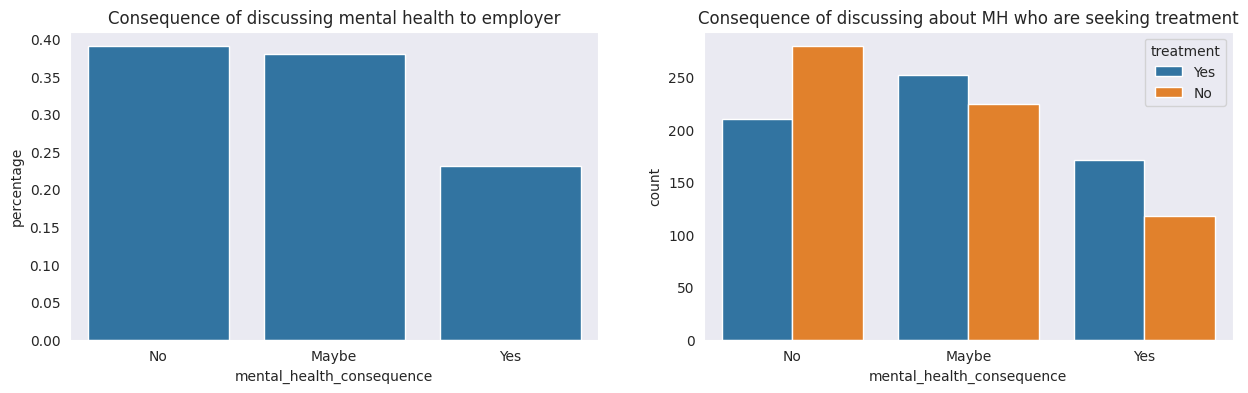

In [31]:
title1 = 'Consequence of discussing mental health to employer'
title2 = 'Consequence of discussing about MH who are seeking treatment'
pl_fig(mh_dataset['mental_health_consequence'],title1, title2)

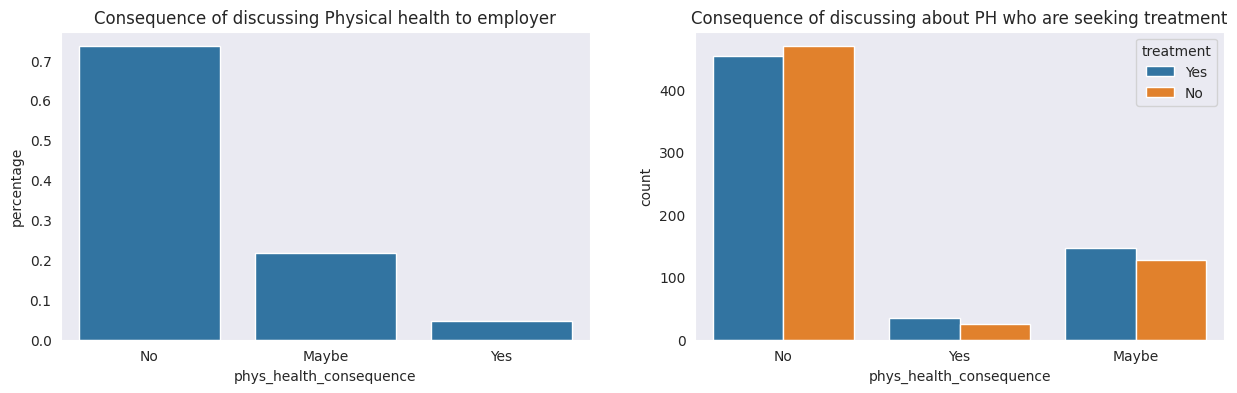

In [32]:
title1 = 'Consequence of discussing Physical health to employer'
title2 = 'Consequence of discussing about PH who are seeking treatment'
pl_fig(mh_dataset['phys_health_consequence'],title1, title2)

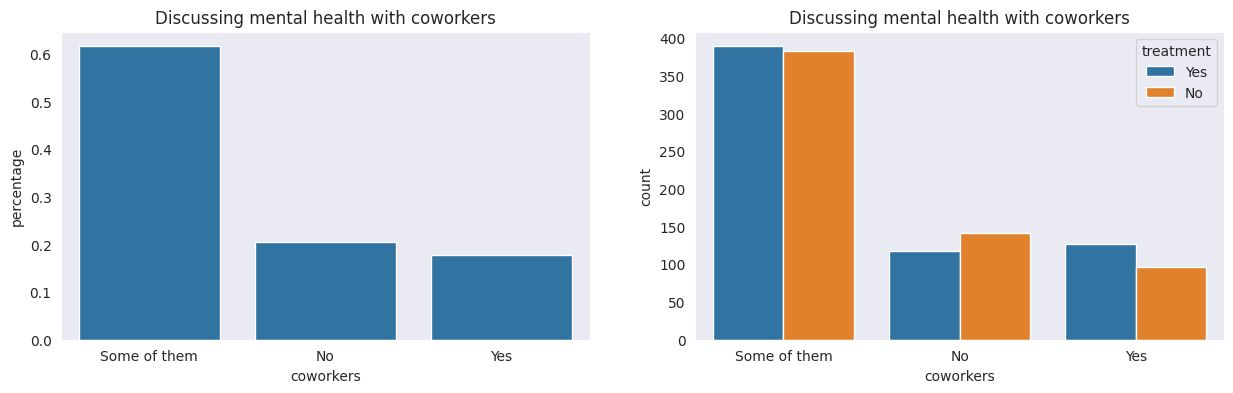

In [33]:
title1 = 'Discussing mental health with coworkers'
pl_fig(mh_dataset['coworkers'],title1, title1)

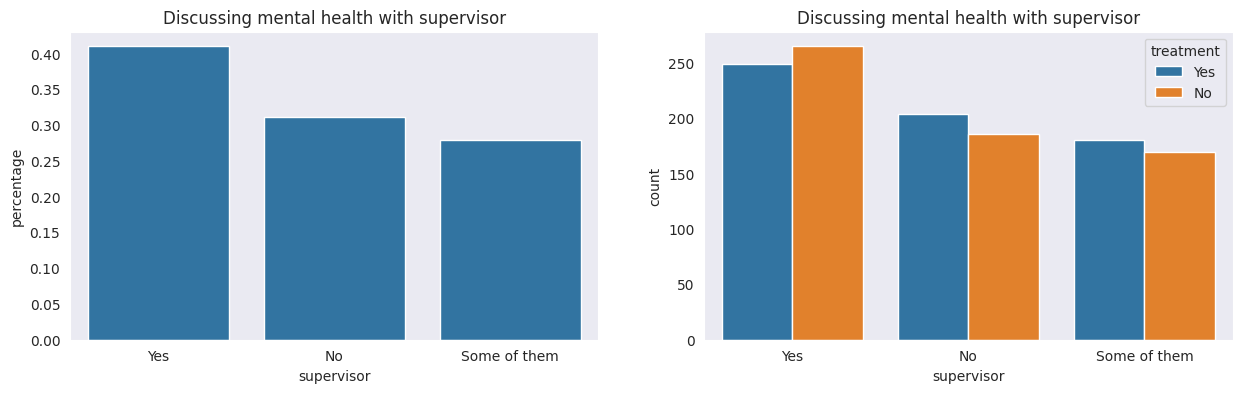

In [34]:
title1 = 'Discussing mental health with supervisor'
pl_fig(mh_dataset['supervisor'],title1, title1)

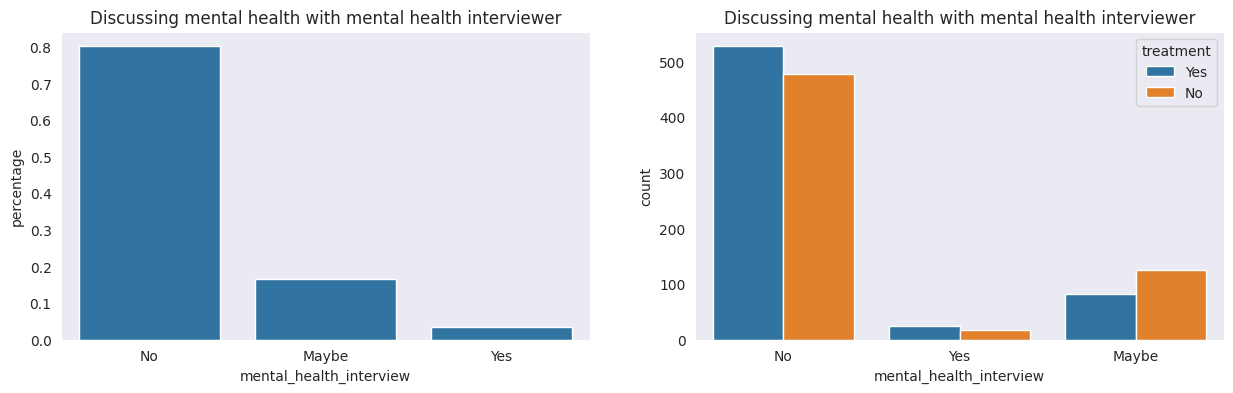

In [35]:

title1 = 'Discussing mental health with mental health interviewer'
pl_fig(mh_dataset['mental_health_interview'],title1, title1)

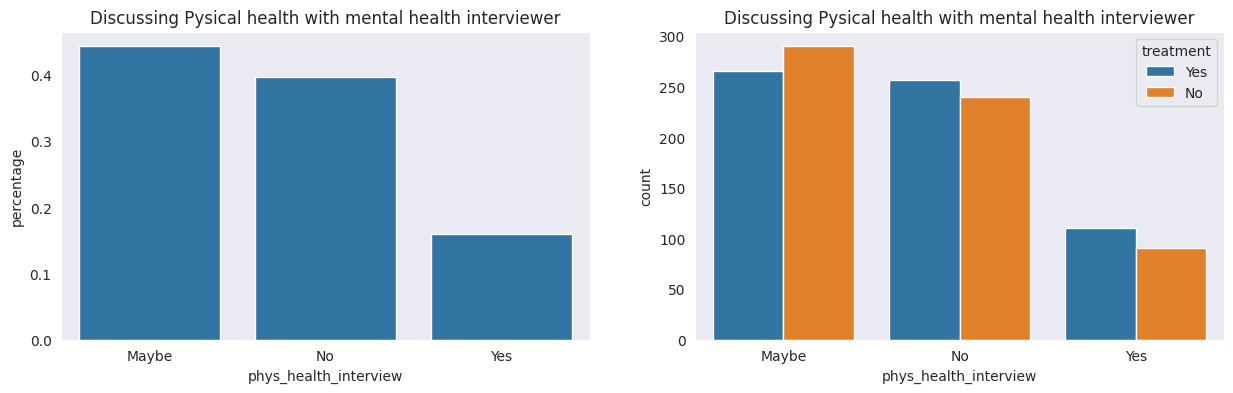

In [36]:
title1 = 'Discussing Pysical health with mental health interviewer'
pl_fig(mh_dataset['phys_health_interview'],title1, title1)

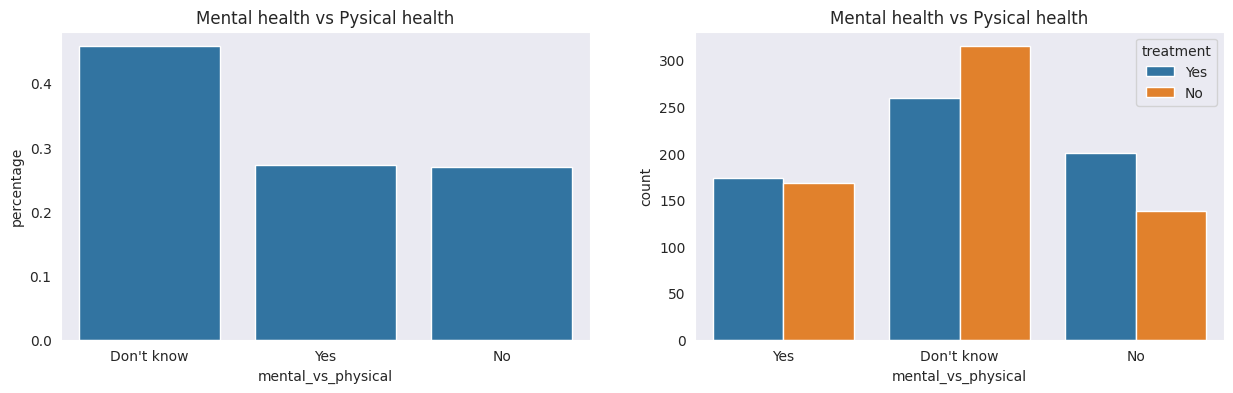

In [37]:
title1 = "Mental health vs Pysical health"
pl_fig(mh_dataset['mental_vs_physical'],title1, title1)

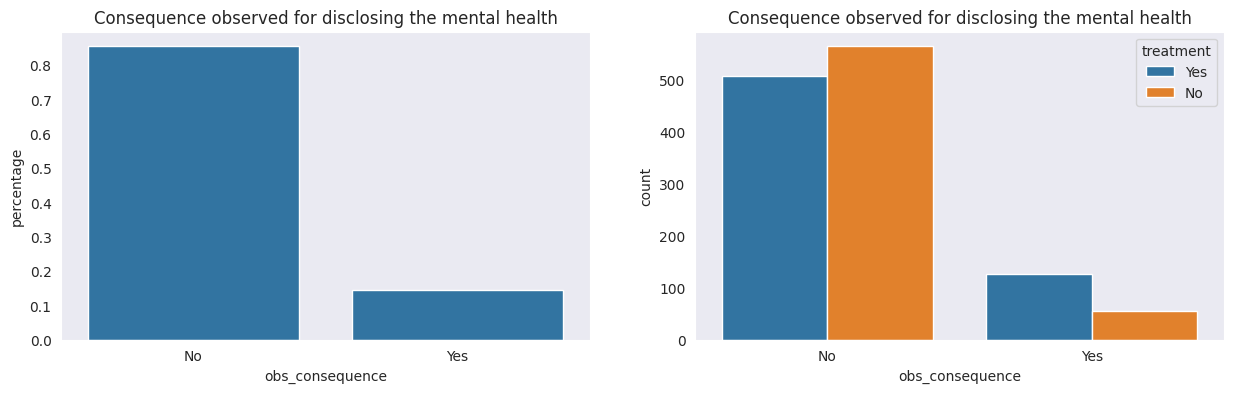

In [38]:
title1 = 'Consequence observed for disclosing the mental health'
pl_fig(mh_dataset['obs_consequence'],title1, title1)

In [39]:
mh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   self_employed              1254 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             1254 non-null   object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave        

In [40]:
mh_dataset.isnull().sum()

,0
Age,0
Gender,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0
tech_company,0
benefits,0


In [41]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col:
    print('{} :{} ' . format(col.upper(),mh_dataset[col].unique()))

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72] 
GENDER :['Female' 'Male' 'Other'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't Know"] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Yes' 'Maybe'] 
PHYS_HEALTH_INTE

In [42]:

from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(mh_dataset[col])
    mh_dataset[col] = label_encoder.transform(mh_dataset[col])

In [43]:
mh_dataset['treatment'].value_counts()

,count
treatment,
1,633
0,621


<Axes: >

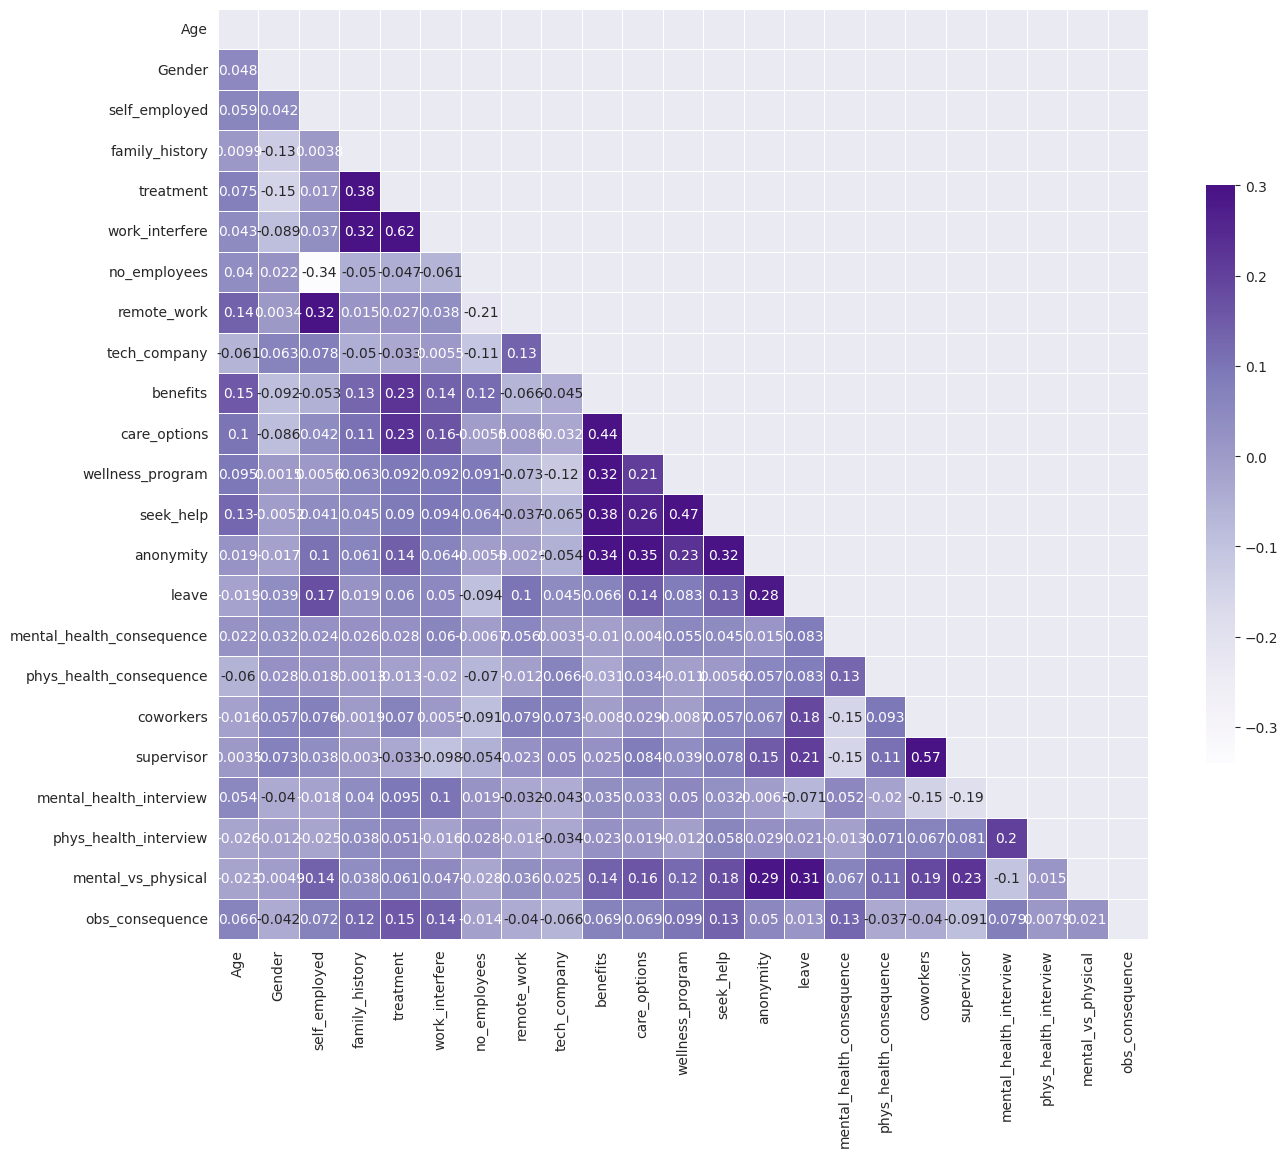

In [44]:
corr = mh_dataset.corr()

mask = np.zeros_like(corr, dtype=bool)  # Using Python's built-in bool
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [54]:
import xgboost as xgb
from sklearn.metrics import RocCurveDisplay  # For plotting ROC curves
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
from sklearn.model_selection import train_test_split
X = mh_dataset.drop('treatment', axis = 1)
y = mh_dataset['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [57]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, m

In [58]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8037135278514589
KNeighborsClassifier 0.6631299734748011
DecisionTreeClassifier 0.7214854111405835
RandomForestClassifier 0.7771883289124668
GradientBoostingClassifier 0.8116710875331565
AdaBoostClassifier 0.8010610079575596
XGBClassifier 0.7931034482758621


Text(0.5, 1.0, 'Plotting the Model Accuracies')

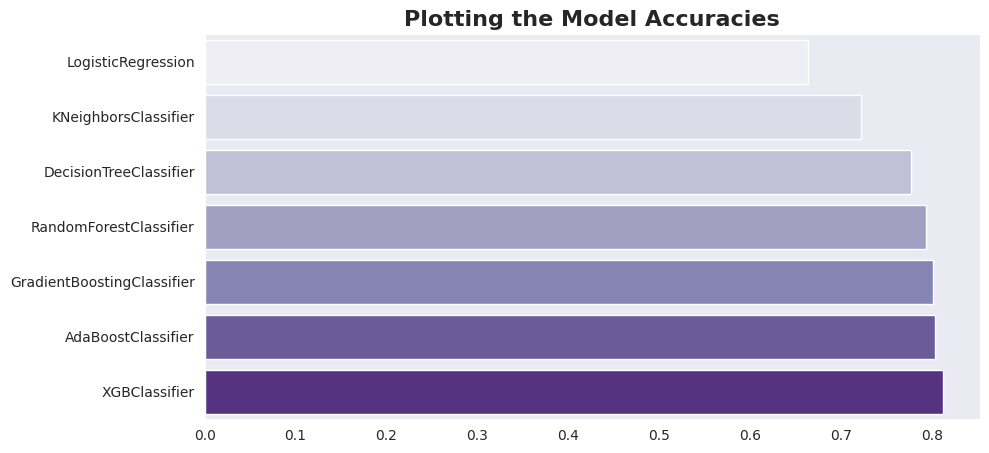

In [59]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = predicted, y = key, palette='Purples', order=predicted.sort())
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")